In [1]:
%matplotlib inline


# Early stopping of Gradient Boosting

Gradient boosting is an ensembling technique where several weak learners
(regression trees) are combined to yield a powerful single model, in an
iterative fashion.

Early stopping support in Gradient Boosting enables us to find the least number
of iterations which is sufficient to build a model that generalizes well to
unseen data.

The concept of early stopping is simple. We specify a ``validation_fraction``
which denotes the fraction of the whole dataset that will be kept aside from
training to assess the validation loss of the model. The gradient boosting
model is trained using the training set and evaluated using the validation set.
When each additional stage of regression tree is added, the validation set is
used to score the model.  This is continued until the scores of the model in
the last ``n_iter_no_change`` stages do not improve by atleast `tol`. After
that the model is considered to have converged and further addition of stages
is "stopped early".

The number of stages of the final model is available at the attribute
``n_estimators_``.

This example illustrates how the early stopping can used in the
:class:`~sklearn.ensemble.GradientBoostingClassifier` model to achieve
almost the same accuracy as compared to a model built without early stopping
using many fewer estimators. This can significantly reduce training time,
memory usage and prediction latency.


In [2]:

import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split




- Load digits data set using `load_digits()`
- Train `GradientBoostingCLassifier` with and without early stopping
- Keep a timer for both cases and report the time it takes to train both models
- Report the scores for both models

In [3]:
data_list = [load_digits()]
data_list = [(d.data, d.target) for d in data_list]

names = ['Digits Data']

ngb = []
scoregb = []
timegb = []
ngbes = []
scoregbes = []
timegbes = []

n_estimators = 500

for X, y in data_list:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
    
    # If the scores don't improve by at least 0.01 for the last 10 stages, stop additional fitting

    gbes = GradientBoostingClassifier(n_estimators=n_estimators, validation_fraction=0.2, n_iter_no_change=5,
                                 tol=0.01, random_state=0)

    gb = GradientBoostingClassifier(n_estimators=n_estimators, random_state=0)

    start = time.time()
    gb.fit(X_train, y_train)
    timegb.append(time.time() - start)

    start = time.time()
    gbes.fit(X_train, y_train)
    timegbes.append(time.time() - start)
    
    scoregb.append(gb.score(X_test, y_test))
    scoregbes.append(gbes.score(X_test, y_test))
    
    ngb.append(gb.n_estimators_)
    ngbes.append(gbes.n_estimators_)
    
bar_width = 0.2
n = len(data_list)
index = np.arange(0, n * bar_width, bar_width) * 2.5
index = index[0:n]

## Compare scores with and without early stopping

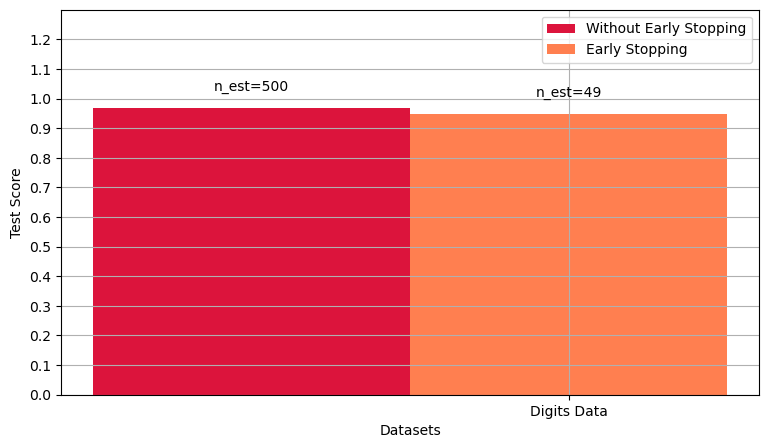

In [5]:
plt.figure(figsize = (9,5))

bar1 = plt.bar(index, scoregb, bar_width, label="Without Early Stopping",
              color='crimson')
bar2 = plt.bar(index + bar_width, scoregbes, bar_width,
              label = 'Early Stopping', color='coral')
plt.xticks(index + bar_width, names)
plt.yticks(np.arange(0, 1.3, 0.1))
def autolabel(rects, n_estimators):
    for i, rect in enumerate(rects):
        plt.text(rect.get_x() + rect.get_width() / 2.,
                1.05 * rect.get_height(), 'n_est=%d' % n_estimators[i],
                ha='center', va='bottom')
        
autolabel(bar1, ngb)
autolabel(bar2, ngbes)

plt.ylim([0, 1.3])
plt.legend(loc = 'best')
plt.grid(True)

plt.xlabel('Datasets')
plt.ylabel('Test Score')

plt.show()

## Compare Fit Times with and without Early Stopping

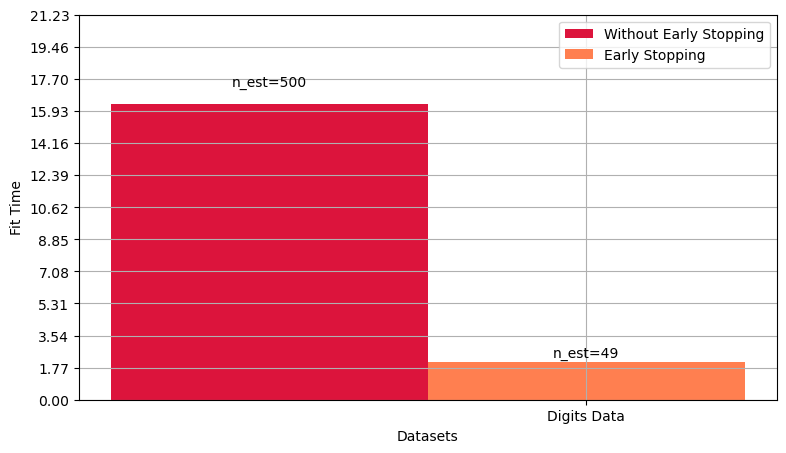

In [6]:
plt.figure(figsize=(9, 5))

bar1 = plt.bar(index, timegb, bar_width, label = "Without Early Stopping",
              color = 'crimson')
bar2 = plt.bar(index + bar_width, timegbes, bar_width,
              label = "Early Stopping", color = 'coral')

max_y = np.amax(np.maximum(timegb, timegbes))

plt.xticks(index + bar_width, names)
plt.yticks(np.linspace(0, 1.3 * max_y, 13))

autolabel(bar1, ngb)
autolabel(bar2, ngbes)

plt.ylim([0, 1.3 * max_y])
plt.legend(loc = 'best')
plt.grid(True)

plt.xlabel('Datasets')
plt.ylabel('Fit Time')

plt.show()